In [10]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable, List

%matplotlib inline

## Estimating the gradient

In [1]:
def difference_quotient(f: Callable[[float], float], x: float, h:float) -> float:
  return (f(x+h)-f(x))/h

In [2]:
def square(x:float) -> float:
  return x*x

In [3]:
def derivative(x: float) -> float:
  return 2*x

In [5]:
# estimating derivatives by evaluating the difference quotient for a very small e
# one such estimation

xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

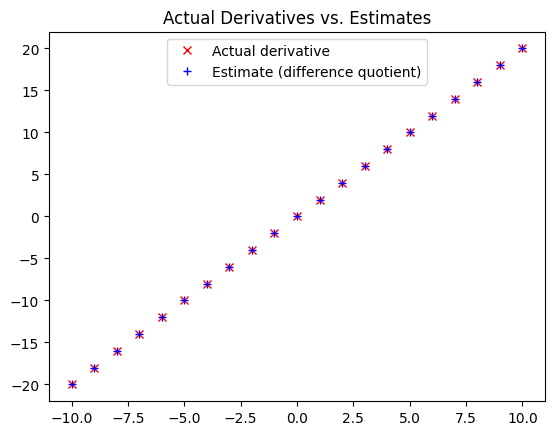

In [8]:
# plot - actual derivatives and estimates(difference quotient) are same
plt.title('Actual Derivatives vs. Estimates')
plt.plot(xs, actuals, 'rx', label='Actual derivative')
plt.plot(xs, estimates, 'b+', label='Estimate (difference quotient)')
plt.legend(loc=9)
plt.show()

# so this is intresting to know
> This basically means that if there is no way to calculate a gradient, `difference quotient` can be utilised.

-----------------
when `f` is a function of many variables.

In [5]:
Vector=List[float]
def partial_difference_quotient(f: Callable[[Vector], float], v:Vector, i: int, h:float)->float:
  """Returns the i-th partial difference quotient of f at v"""

  w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)] # add h to just the ith element of v
  return (f(w)-f(v))/h

In [6]:
def estimate_gradient(f: Callable[[Vector], float], v: Vector, h: float = 0.0001):
  return [partial_difference_quotient(f,v,i,h) for i in range(len(v))]

> `estimate using difference quotients` - computationally expensive

## Using gradient-descent to fit models

In [8]:
# x ranges from -50 to 49, y is always 20*x+5
inputs = [(x, 20*x+5) for x in range(-50, 50)]

# although the relationship is known, gradient-descent will be used to find the
# slope and intercept that minimise the average squared error.

In [9]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
  slope, intercept = theta
  predicted = slope * x + intercept   # prediction of the model.
  error = (predicted - y)             # error is (predicted - actual)
  squared_error = error ** 2          # we'll minimise the squared error
  grad = [2 * error * x, 2 * error]
  return grad

This code is an implementation of a common method for optimizing simple linear regression models using gradient descent. Linear regression tries to find a linear relationship between an independent variable (x) and a dependent variable (y) in the form of `y = mx + c` where `m` is the slope and `c` is the y-intercept.

Here, the purpose of the `linear_gradient` function is to calculate the gradient of the error (loss) function with respect to the parameters `theta` which includes `m` (slope) and `c` (intercept). These gradients are used in the gradient descent optimization algorithm which is used to find the best parameters (`m` and `c`) that minimize the error function.

The gradient is calculated by taking the partial derivative of the squared error function (which is chosen as the loss function here) with respect to each parameter.

1. The `predicted` is what our model predicts as the output using the current parameters (slope and intercept).
2. We then calculate the `error` which is the difference between the predicted y-value and the actual y-value.
3. The `squared_error` = `error^2` is the loss function used in this case. The aim is to minimize this error.
4. The `grad` vector will hold the partial derivatives. It is calculated by applying the chain rule of derivatives. The 2 * error term comes from differentiating the `squared_error` (which gives `2*error`), and the `x` and 1 (for intercept term) comes from differentiating `slope * x + intercept`(predict function) w.r.t slope and intercept respectively.

Our goal here is to minimize the average squared error of the predictions which is essentially trying to make our predicted line as close as possible to the actual data points. This is done by iteratively adjusting the slope and intercept in the direction that reduces the error. Gradient descent is the algorithm used for these adjustments - it uses these gradients to decide how much to adjust the slope and intercept in each iteration.

In [12]:
def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise mean"""
    num_of_vectors = len(vectors)
    return [sum(vector[i] for vector in vectors) / num_of_vectors
            for i in range(len(vectors[0]))]

In [15]:
def scalar_multiply(c: float, v: Vector) -> Vector:
    """Multiplies every element by c"""
    return [c * v_i for v_i in v]

In [16]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

In [18]:
def add(v: Vector, w: Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    return [v_i + w_i for v_i, w_i in zip(v, w)]

In [21]:
# starting with random values for slope and intercept
theta = [np.random.uniform(-1, 1), np.random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
  # mean of the gradients
  grad = vector_mean([linear_gradient(x, y, theta) for x,y in inputs])
  # step in the direction of minima
  theta = gradient_step(theta, grad, -learning_rate)
  # print(epoch, theta)

In [22]:
slope, intercept=theta
assert 19.9 < slope < 20.1, "slope should be above 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

> we can implement Minibatch & Stochastic gradient descent as well which is widely used for large datasets and expensive gradients.

# Script complete